## PART 2: Boundary conditions

In the last part we left the edges of the simulation domain set with zero electric fieldm therefore simulating a perfect electric conductor boundary.

In this part we'll implement an absorbing boundary and record the field leaving the simulation domain.

In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
freq = 3e9
w = 2*pi*freq

L_T = 0.5
N_l = 100

wavelength = c/freq
dz1 = wavelength/N_l
N_T = round(L_T/dz1)+1
dz = L_T/N_T

print("Wavelength = ", wavelength)
print("N_T = ", N_T)
print("d_z = ", dz)

Wavelength =  0.09993081933333334
N_T =  501
d_z =  0.000998003992015968


In [24]:
S = 0.5
dt = S*dz/c
print(dt)

1.6644914930047506e-12


<IPython.core.display.Javascript object>


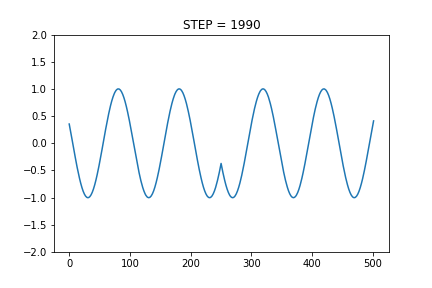

<IPython.core.display.Javascript object>


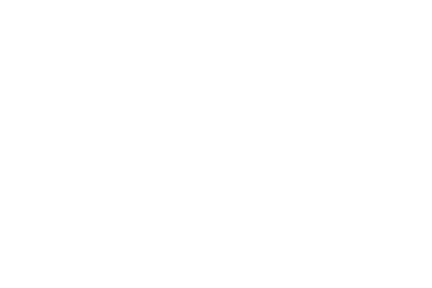

In [32]:
#Number of time steps
STEPS = 2000

#Initialize fields
ey = np.zeros(N_T+1)
hx = np.zeros(N_T)

#Initialize boundary conditions
ey_0_2 = 0
ey_0_1 = 0
ey_N_2 = 0
ey_N_1 = 0
    
#Location of source    
k_source = round(N_T/2)

#location of probe
k_probe = N_T-10
ey_probe = np.zeros(STEPS)

#Initialize dynamic figure
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

for n in range(0,STEPS):

    for k in range(0,N_T):
        hx[k] = hx[k] + dt/(dz*mu_0)*(ey[k+1]-ey[k])

    for k in range(1,N_T):
        ey[k] = ey[k] + dt/(dz*epsilon_0)*(hx[k] - hx[k-1])

    #Apply source
    ey[k_source] = ey[k_source] + np.sin(w*n*dt)
    
    #Apply old boundary condition
    ey[0] = ey_0_2
    ey[N_T] = ey_N_2
    
    #Save boundary condition
    ey_0_2 = ey_0_1
    ey_0_1 = ey[1]
    ey_N_2 = ey_N_1
    ey_N_1 = ey[N_T-1]
    
    #Save field at probe location
    ey_probe[n] = ey[k_probe]
    
    if n%10==0:
        ax.clear()
        ax.plot(ey)
        ax.axes.set_ylim(-2,2)
        ax.set_title('STEP = %i' % n)
        fig.canvas.draw()
        time.sleep(0.05)
    
#plt.plot(ey_probe)

<IPython.core.display.Javascript object>


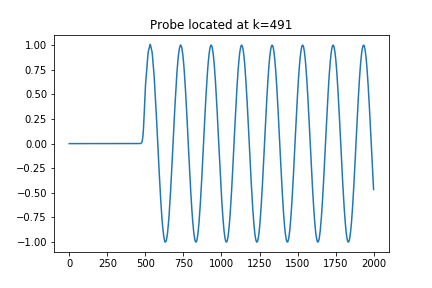

<IPython.core.display.Javascript object>


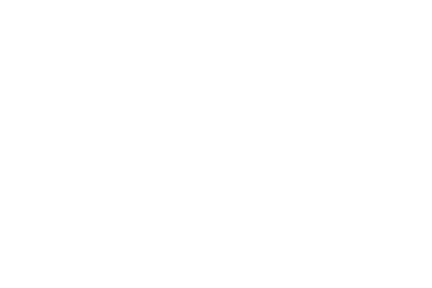

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.canvas.draw()
ax.plot(ey_probe)
ax.set_title('Probe located at k=%i' % k_probe)
fig.canvas.draw()